In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MLDL/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 전처리

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
categorical_data = df.select_dtypes(include=[object])
print("categorical features: ", categorical_data.shape[1])
numerical_data = df.select_dtypes(include=[np.float64, np.int64])
print("numerical features: ", numerical_data.shape[1])

categorical features:  7
numerical features:  5


In [7]:
categorical_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


<Axes: xlabel='Outlet_Size', ylabel='count'>

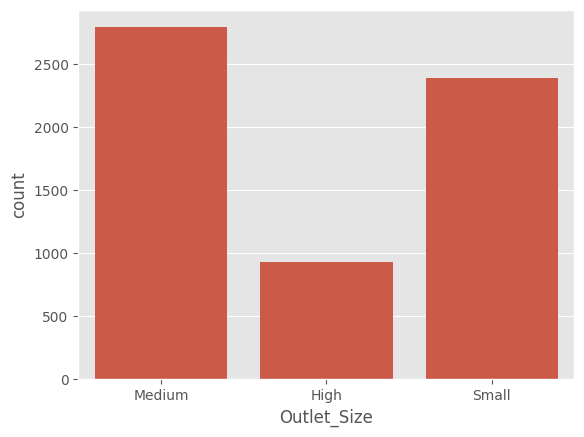

In [8]:
sns.countplot(x='Outlet_Size', data=categorical_data)

In [9]:
categorical_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [10]:
#Outlet_Size의 결측치를 최빈값으로 대체
categorical_data['Outlet_Size'] = categorical_data['Outlet_Size'].fillna(categorical_data['Outlet_Size'].mode()[0])

In [11]:
categorical_data.isnull().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

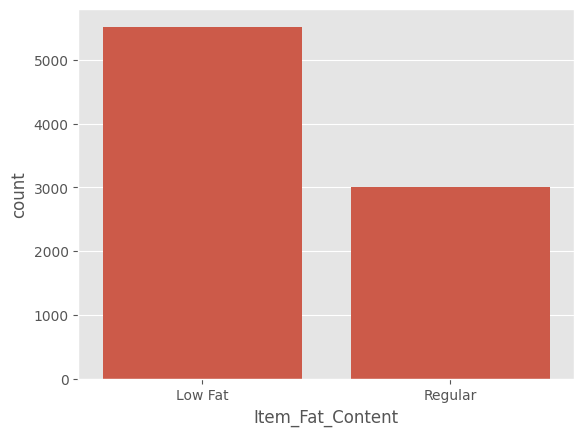

In [14]:
sns.countplot(x='Item_Fat_Content', data=categorical_data)

In [13]:
#범주명 일원화
categorical_data.replace({'Item_Fat_Content':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

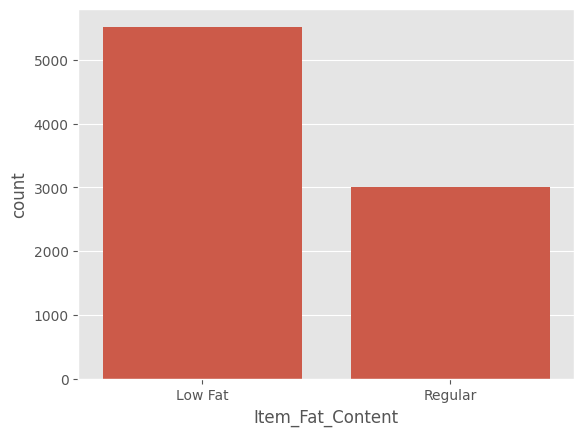

In [15]:
#countplot:범주별로 집계
sns.countplot(x='Item_Fat_Content', data=categorical_data)

<Axes: xlabel='count', ylabel='Outlet_Identifier'>

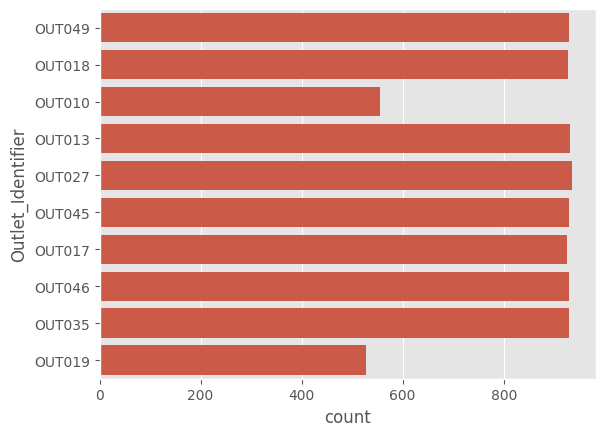

In [16]:
#y축으로 바꿔서 다시 보기: x축으로는 잘안보여서
sns.countplot(y='Outlet_Identifier', data=categorical_data)

In [17]:
categorical_data['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item_Type'>

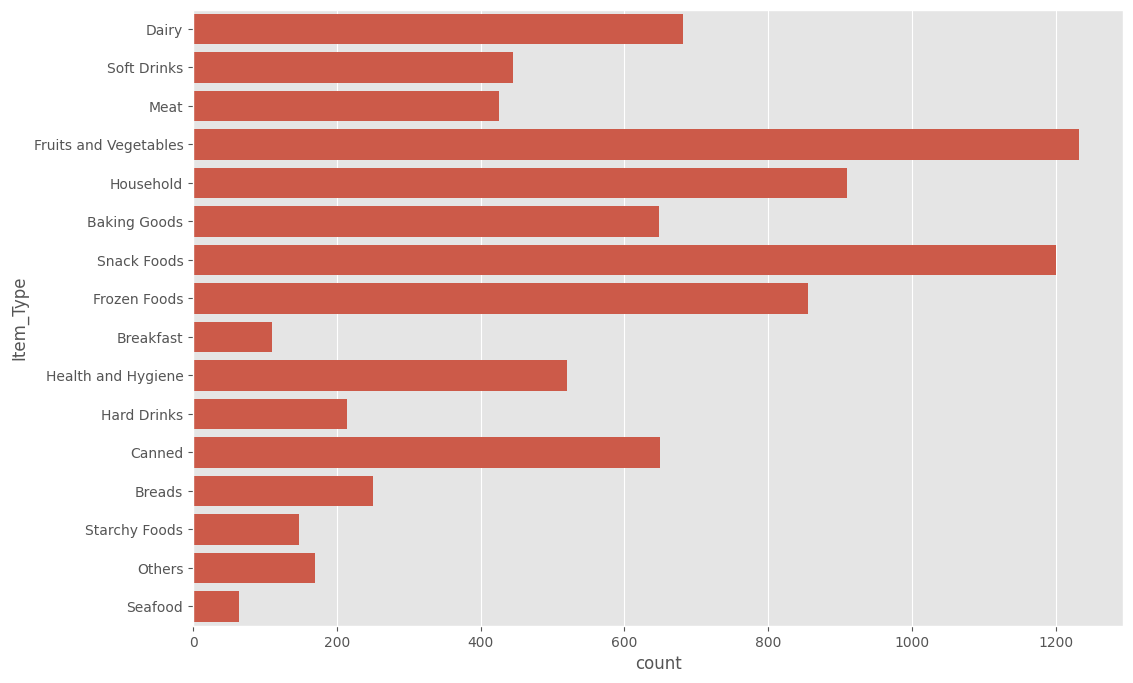

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(y='Item_Type', data=categorical_data)

#1등:과일야채, 2등:스낵, 3등:하우스홀드

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

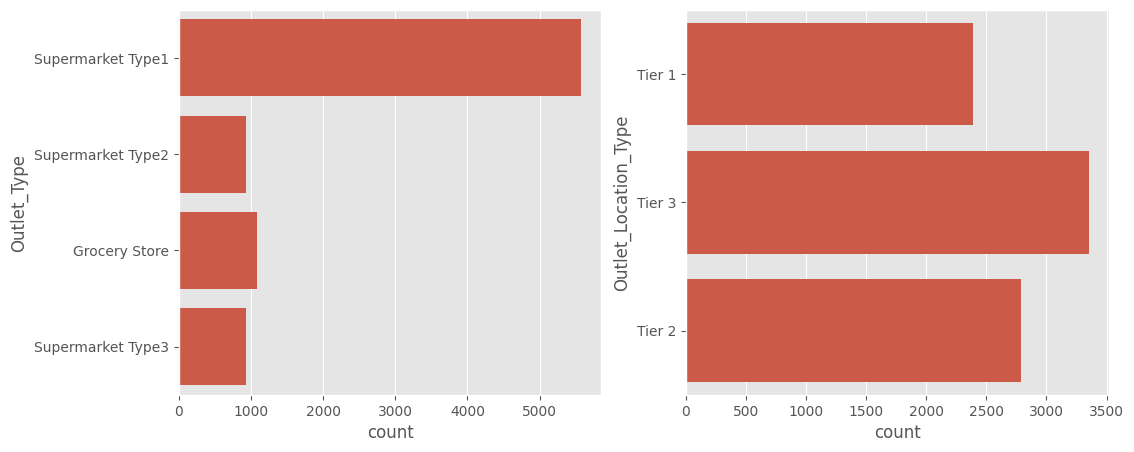

In [ ]:
#1개 행에 2개 그래프 그리기
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.countplot(y='Outlet_Type', data = categorical_data, ax=axes[0]) #첫번째그래프
sns.countplot(y='Outlet_Location_Type', data = categorical_data, ax=axes[1]) #두번째그래프

In [ ]:
numerical_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

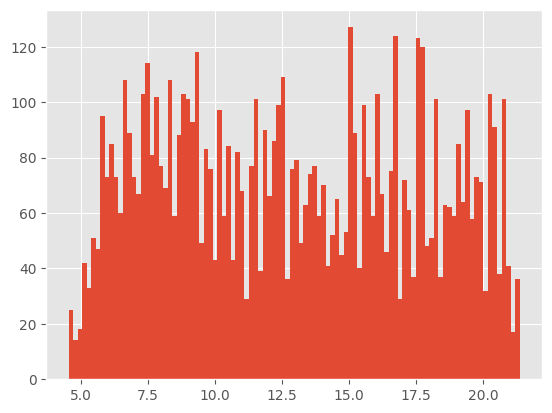

In [ ]:
numerical_data['Item_Weight'].hist(bins=100)

<Axes: >

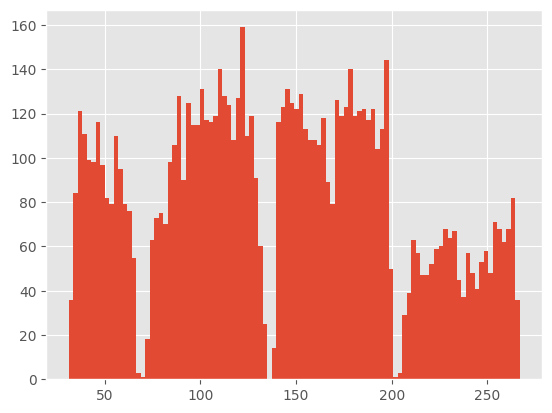

In [ ]:
numerical_data['Item_MRP'].hist(bins=100)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

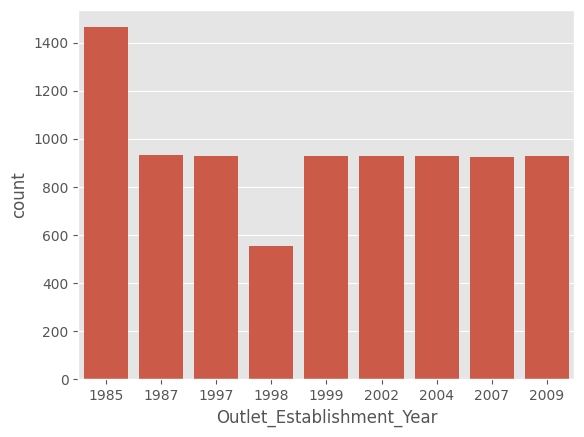

In [ ]:
sns.countplot(x='Outlet_Establishment_Year', data=numerical_data)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

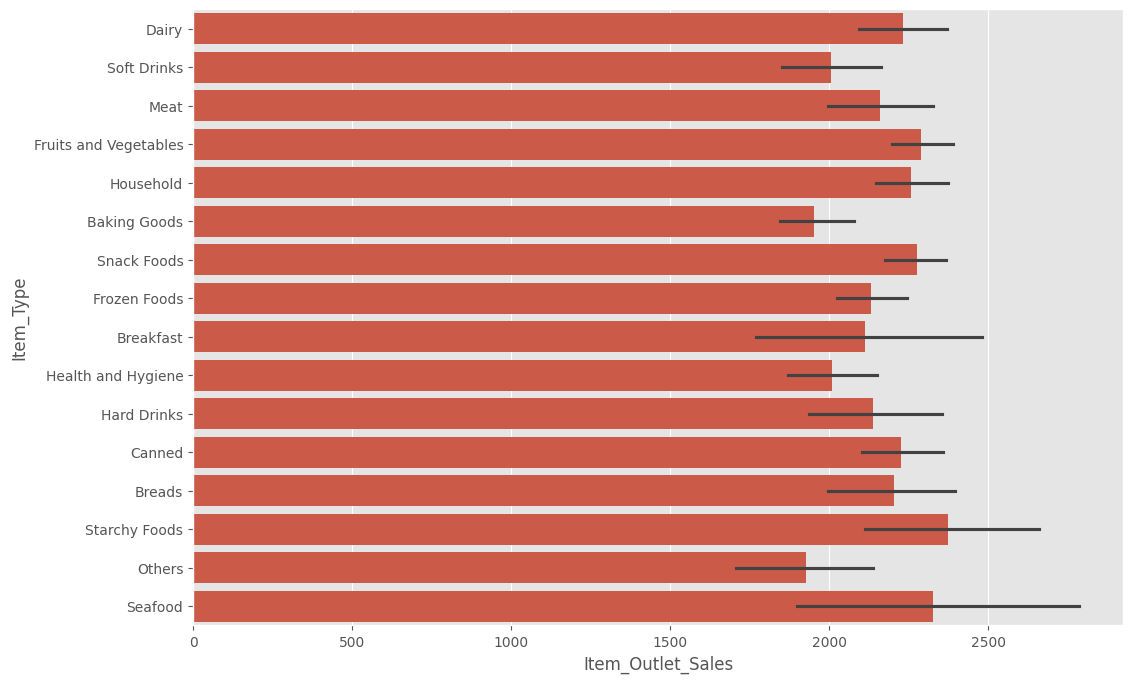

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=df)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

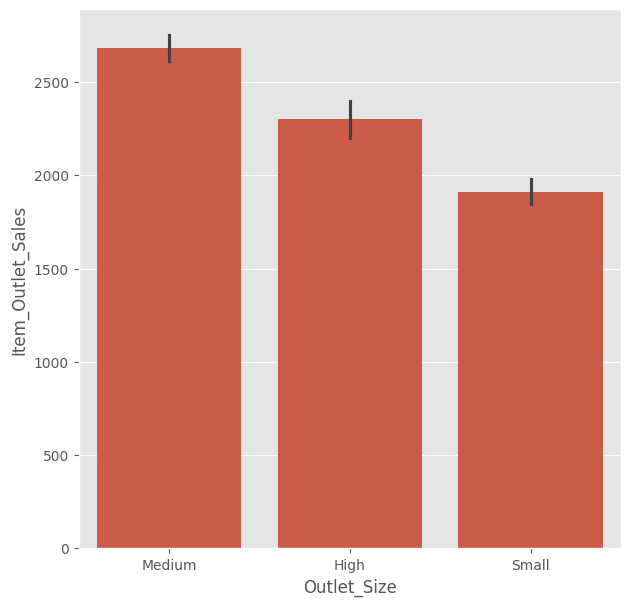

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

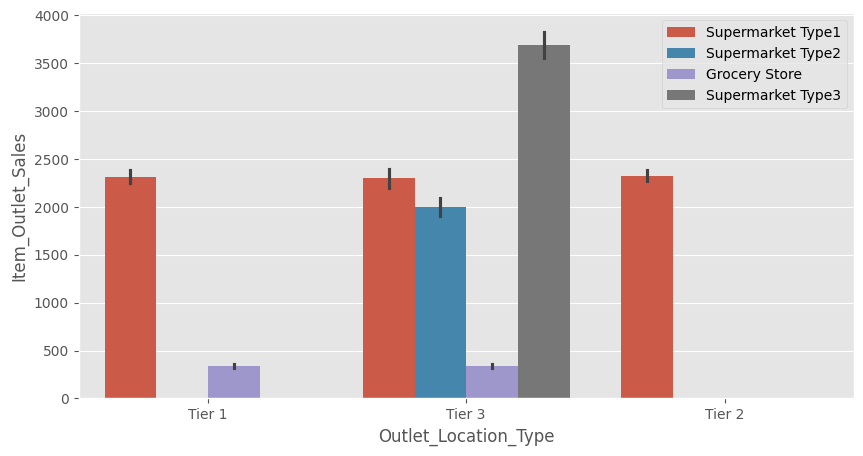

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type', data=df)
plt.legend()

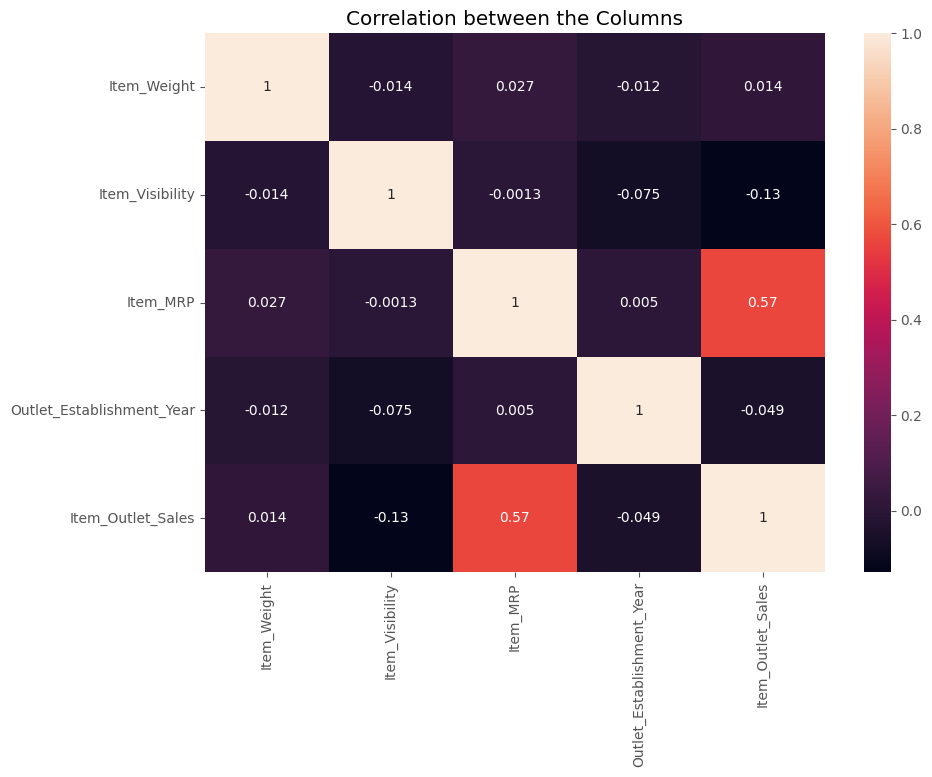

In [ ]:
plt.figure(figsize=(10,7))
# select_dtypes를 사용하여 수치형 데이터만 포함한 데이터프레임을 생성
numeric_df = df.select_dtypes(include=[np.number])
# 상관 계수 계산
corr_matrix = numeric_df.corr()
# 히트맵으로 상관 계수 시각화
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation between the Columns')
plt.show()

## Pycaret 돌려보기

### 1) 0단계

In [19]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [20]:
# catboost 포함?
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━

In [21]:
combined_data = pd.concat([categorical_data, numerical_data], axis=1)

In [30]:
from pycaret.regression import *

exp_clf = setup(data = combined_data, target='Item_Outlet_Sales', session_id=51)

,Description,Value
0,Session id,51
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(8523, 12)"
4,Transformed data shape,"(8523, 43)"
5,Transformed train set shape,"(5966, 43)"
6,Transformed test set shape,"(2557, 43)"
7,Numeric features,4
8,Categorical features,7
9,Rows with missing values,17.2%


### 2)모델 돌리기

In [32]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,857.6815,1555977.2791,1245.2368,0.4596,0.6078,0.6324,1.4250
catboost,CatBoost Regressor,863.1545,1584055.8444,1257.0823,0.4498,0.6137,0.6248,4.4100
lightgbm,Light Gradient Boosting Machine,862.6589,1590554.3609,1259.5091,0.4477,0.6029,0.6243,0.4660
rf,Random Forest Regressor,878.5902,1653947.4879,1284.6133,0.4247,0.6046,0.6188,5.6530
lr,Linear Regression,940.5283,1659144.0428,1286.6947,0.4235,0.7663,1.0657,0.8170
ridge,Ridge Regression,940.6124,1659559.5147,1286.8552,0.4233,0.7665,1.0655,0.3770
lasso,Lasso Regression,940.7769,1661587.4520,1287.6260,0.4226,0.7623,1.0638,0.3250
br,Bayesian Ridge,941.5664,1664334.7144,1288.6998,0.4217,0.7666,1.0635,0.5250
llar,Lasso Least Angle Regression,944.0836,1679299.8290,1294.3127,0.4168,0.7688,1.0604,0.2010
huber,Huber Regressor,947.7559,1709233.8416,1306.0181,0.4063,0.7744,1.0383,0.3080


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=51, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
gbr = create_model('gbr') #객체 생성

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,882.5524,1539091.7348,1240.6014,0.4251,0.6531,0.7302
1,842.4786,1513863.8930,1230.3918,0.4360,0.5648,0.5424
2,902.0526,1658371.8073,1287.7779,0.4628,0.6145,0.6206
3,882.3915,1766164.5990,1328.9713,0.3464,0.6178,0.6402
4,901.5449,1898064.1683,1377.7025,0.4672,0.5984,0.5855
5,871.8989,1670372.7025,1292.4290,0.4588,0.6114,0.6444
6,794.6921,1263180.2362,1123.9129,0.5710,0.6107,0.6341
7,860.1327,1474428.8404,1214.2606,0.4754,0.6095,0.6575
8,798.4342,1370649.9084,1170.7476,0.4762,0.6088,0.6615


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
rf = create_model('rf') #rf 객체 생성

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,913.2135,1651731.9690,1285.1972,0.3830,0.6507,0.7148
1,862.7528,1610907.6614,1269.2154,0.3999,0.5780,0.5512
2,905.0354,1722523.1419,1312.4493,0.4421,0.5925,0.5910
3,899.3644,1813079.0461,1346.5062,0.3290,0.6123,0.6349
4,919.9104,1948161.7633,1395.7657,0.4532,0.5868,0.5813
5,888.6636,1773812.0081,1331.8453,0.4253,0.6124,0.6202
6,818.3215,1374113.0079,1172.2257,0.5334,0.5855,0.6026
7,873.2273,1566483.6789,1251.5925,0.4427,0.6052,0.6269
8,833.2144,1517902.7697,1232.0320,0.4199,0.6224,0.6652


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
tune_model(estimator = gbr, optimize='R2') # gbr 모델 튜닝, 디폴트 10회 fold 실행

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,898.1293,1607388.7998,1267.8284,0.3995,0.6659,0.7485
1,840.6052,1446256.8197,1202.6042,0.4612,0.5851,0.5530
2,892.0164,1621917.5833,1273.5453,0.4747,0.6139,0.6226
3,870.0696,1616058.7273,1271.2430,0.4020,0.6374,0.6744
4,884.5066,1844462.7278,1358.1100,0.4823,0.5917,0.5841
5,858.4235,1673651.5544,1293.6969,0.4577,0.6534,0.6306
6,795.4280,1247803.8034,1117.0514,0.5762,0.6346,0.6208
7,862.2329,1523580.5044,1234.3340,0.4580,0.6133,0.6504
8,806.9759,1377398.2643,1173.6261,0.4736,0.6290,0.6863


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='squared_error',
                          max_depth=7, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.5, min_samples_leaf=1,
                          min_samples_split=4, min_weight_fraction_leaf=0.0,
                          n_estimators=250, n_iter_no_change=None,
                          random_state=51, subsample=0.35, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
gbr = create_model('gbr', subsample=0.4, max_depth=5, learning_rate=0.05, min_samples_split=4, min_impurity_decrease=0.5)
tuned_gbr = tune_model(gbr, custom_grid={'n_estimators': [50, 100, 150, 200, 250]})

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,902.1059,1597526.2453,1263.9328,0.4032,0.6668,0.7661
1,847.4806,1526602.8198,1235.5577,0.4313,0.5790,0.5692
2,891.2721,1638249.5937,1279.9412,0.4694,0.6025,0.6298
3,870.6584,1670977.9207,1292.6631,0.3816,0.6157,0.6668
4,904.4048,1886837.5371,1373.6221,0.4704,0.5910,0.6079
5,874.3379,1707972.3873,1306.8942,0.4466,0.6237,0.6662
6,802.1850,1302554.5960,1141.2951,0.5577,0.5966,0.6398
7,865.5685,1506737.7091,1227.4924,0.4640,0.6218,0.6732
8,806.9263,1402489.3420,1184.2674,0.4640,0.6274,0.6967


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,903.6815,1546314.1176,1243.5088,0.4224,0.6944,0.8318
1,849.5889,1503787.2484,1226.2900,0.4398,0.6102,0.6410
2,914.3210,1675766.1375,1294.5139,0.4572,0.6471,0.7215
3,873.5894,1613723.5368,1270.3242,0.4028,0.6515,0.7467
4,919.1873,1908469.4223,1381.4736,0.4643,0.6338,0.6912
5,879.3606,1692506.0542,1300.9635,0.4516,0.6583,0.7454
6,821.5933,1325040.8449,1151.1042,0.5500,0.6586,0.7663
7,867.4313,1478556.4848,1215.9591,0.4740,0.6502,0.7411
8,804.0280,1367864.9949,1169.5576,0.4773,0.6628,0.7750


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits
